# Exploratory Data Analysis

At this stage data is analysed to capture relationships between the target variable: Brewing Method, and potential predictors: other variables in the table.
Hence, removing potential outliers. 

1. First data is read from csv file with clean dataset (clean in the previous project) and transformed into a dataframe.
2. Then data is plotted for each of the variables against the target:
    - check if there is no direct relationships between predictor and target
    - spot outliers
    - observe the data distribution

In [2]:
import pandas as pd

In [6]:
coffee_df = pd.read_csv('data\coffee_desk_dataset_clean.csv', index_col='idx')
coffee_df

,process,process_general,origin,origin_region,roast,grind,arabica_percentage,pure_arabica,washed,natural,fermented_traditional,fermented_closed_tank,brewing_method
idx,,,,,,,,,,,,,
0,Monsooning,Monsooning,Laos,Asia,light,beans,100,True,False,False,False,False,drip
1,Natural,Natural,Brazylia,Latam,medium,beans,100,True,False,True,False,False,drip
2,Natural,Natural,Etiopia,Africa,light,beans,100,True,False,True,False,False,drip
3,Washed,Washed,Etiopia,Africa,light,beans,100,True,True,False,False,False,drip
4,Natural,Natural,Indonezja,Asia,dark,beans,100,True,False,True,False,False,drip
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Rum Aged,Fermented,Gwatemala,Latam,light,beans,100,True,False,False,False,False,drip
861,Natural,Natural,Panama,Latam,light,beans,30,False,False,True,False,False,espresso
862,Pulped natural,Hybrid,Nikaragua,Latam,light,beans,100,True,True,True,False,False,drip


## Data plotting: brewing method

<AxesSubplot:>

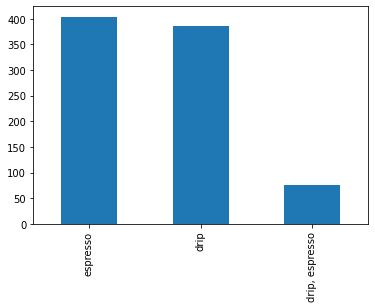

In [7]:
coffee_df['brewing_method'].value_counts().plot(kind='bar')

In [9]:
coffee_df['brewing_method'].value_counts()

espresso          404
drip              386
drip, espresso     75
Name: brewing_method, dtype: int64

### Observation:
Data is visibly evenly distributed among two principal classes.
There is the third class of coffees, which can be used for both brewing with traditioanl espresso style or using more altenative techniques.
Since the principal objective of the client is to be able to buy and offer only the beans which are applicable for the alternative brewing methods (labelled as DRIP), this moxed labels can be changed to DRIP, as in this case they are also good for DRIP but might be cheaper to source, so it would be a missed chance on buiyng cheaper raw materials.

In [11]:
coffee_df['brewing_method_binary'] = coffee_df['brewing_method'].replace({'drip, espresso':'drip'})
coffee_df['brewing_method_binary'].value_counts()

drip        461
espresso    404
Name: brewing_method_binary, dtype: int64

## Data plotting: predictor vs. brewing method

In [12]:
import seaborn as sns

In [16]:
sns.catplot(x="process_general", y="brewing_method_binary", kind="box", data=coffee_df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.